## Get the data

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25 (from 1)
Receiving objects: 100% (39/39), 177.08 MiB | 18.94 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [ ]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [ ]:
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

In [ ]:
def get_lines(filename):
  with open(filename, 'r') as f:
    return f.readlines()

In [ ]:
import os
filenames = [data_dir+filenames for filenames in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

In [ ]:
train_lines = get_lines(data_dir+"train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

## Prepocessing The Data

In [ ]:
def preprocess_text_with_line_numbers(filename):
  input_lines = get_lines(filename)
  abstracts_line = ''
  abstract_samples = []
  for line in input_lines:
    if line.startswith("###"):
      abstract_id = line
      abstract_lines = ""
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines()
      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}
        target_text_split = abstract_line.split("\t")
        line_data["target"] = target_text_split[0]
        line_data["text"] = target_text_split[1].lower()
        line_data["line_number"] = abstract_line_number
        line_data["total_lines"] = len(abstract_line_split) - 1
        abstract_samples.append(line_data)
    else:
      abstract_lines += line
  return abstract_samples

In [ ]:
train_samples = preprocess_text_with_line_numbers(data_dir+"train.txt")
val_samples = preprocess_text_with_line_numbers(data_dir+"dev.txt")
test_samples = preprocess_text_with_line_numbers(data_dir+"test.txt")
len(train_samples), len(val_samples), len(test_samples)

(180040, 30212, 30135)

In [ ]:
train_samples[:11]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_lines': 11},
 {'target': 'METHODS',
  'text': 'secondary outcome measures included the western ontari

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_samples)
val_df = pd.DataFrame(val_samples)
test_df = pd.DataFrame(test_samples)

In [ ]:
train_df.head(10)

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [ ]:
train_df.target.value_counts()

,count
target,
METHODS,59353
RESULTS,57953
CONCLUSIONS,27168
BACKGROUND,21727
OBJECTIVE,13839


<Axes: ylabel='Frequency'>

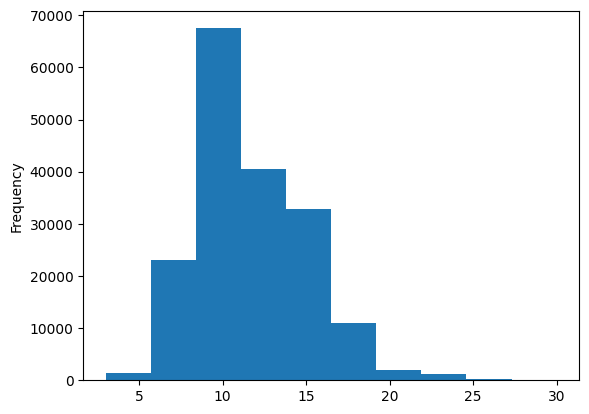

In [ ]:
train_df.total_lines.plot.hist()

In [ ]:
train_df.isna().sum()

,0
target,0
text,0
line_number,0
total_lines,0


In [ ]:
train_df[train_df.total_lines ==0]

,target,text,line_number,total_lines


In [ ]:
train_df[train_df.line_number ==0]

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
12,BACKGROUND,emotional eating is associated with overeating...,0,10
23,BACKGROUND,although working smoke alarms halve deaths in ...,0,14
38,OBJECTIVE,"to evaluate the performance ( efficacy , safet...",0,16
55,OBJECTIVE,eye movements ( em ) during recall of an avers...,0,11
...,...,...,...,...
179982,BACKGROUND,high levels of circulating fibroblast growth f...,0,10
179993,OBJECTIVE,this study sought to compare the efficacy of d...,0,12
180006,BACKGROUND,irregularity measures have been suggested as r...,0,10
180017,OBJECTIVE,among patients with quiescent ulcerative colit...,0,10


In [ ]:
train_sentences = train_df.text.tolist()
val_sentences = val_df.text.tolist()
test_sentences = test_df.text.tolist()

In [ ]:
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_df.target.to_numpy())
val_labels = label_encoder.transform(val_df.target.to_numpy())
test_labels = label_encoder.transform(test_df.target.to_numpy())
train_labels[:10]

array([3, 2, 2, 2, 2, 2, 4, 4, 4, 4])

In [ ]:
num_class = len(label_encoder.classes_)
class_name = label_encoder.classes_
class_name, num_class

(array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object),
 5)

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

## Model 1: Baseline Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_0.score(X=val_sentences,y=val_labels)

0.7218323844829869

In [ ]:
baseline_preds = model_0.predict(test_sentences)
baseline_preds

array([2, 2, 2, ..., 4, 4, 4])

In [ ]:
baseline_results = calculate_results(y_true=test_labels,y_pred=baseline_preds)
baseline_results

{'accuracy': 71.6674962667994,
 'precision': 0.7124322482375202,
 'recall': 0.716674962667994,
 'f1': 0.6925101703856846}

## Preprocess The Data

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len

26.338269273494777

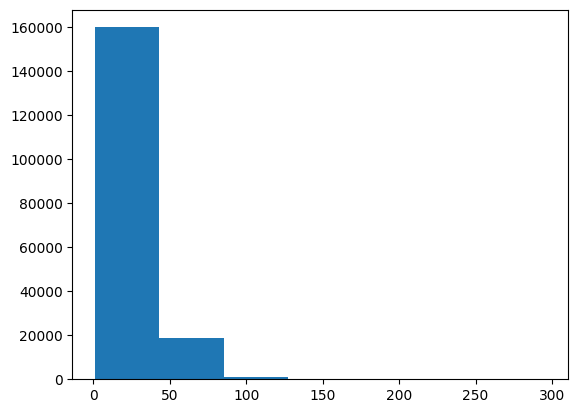

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=7);

In [ ]:
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

In [ ]:
max(sent_lens)

296

In [ ]:
max_tokens = 68000

In [ ]:
from tensorflow.keras.layers import TextVectorization
text_vectorizer = TextVectorization(max_tokens=max_tokens,output_sequence_length=60, standardize="lower_and_strip_punctuation")

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}")

Text:
this study compared the effects of propofol with those of sevoflurane on intraocular pressure in patients undergoing robot-assisted laparoscopic radical prostatectomy in a @ trendelenburg position .

Length of text: 27

Vectorized text:
[[  23   17   34    2   71    4  914    7  125    4 1818   18 1944  200
     5   12  295 5796  723 2421 5328    5    8 7284 1020    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0]]


In [ ]:
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"),
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")

Number of words in vocabulary: 64841
Most common words in the vocabulary: ['', '[UNK]', 'the', 'and', 'of']


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
train_dataset = (train_dataset.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE).batch(32))
valid_dataset = (valid_dataset.cache().prefetch(tf.data.AUTOTUNE).batch(32))
test_dataset = (test_dataset.cache().prefetch(tf.data.AUTOTUNE).batch(32))

train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
for example in train_dataset.take(2):
  print(example)

(<tf.Tensor: shape=(32,), dtype=string, numpy=
array([b'@ patients were randomly assigned to chemotherapy and @ to erlotinib , and @ ( @ % ) and @ ( @ % ) , respectively , were included in the per-protocol analysis .',
       b'decompression of the tibial nerve does not result in a significant difference between baseline and follow-up in csa using ultrasound between the operated and control leg .',
       b'results further suggest that attention maintenance on food relates to eating motivation when in a neutral affective state , and might therefore be a cognitive mechanism contributing to increased food intake in general , but maybe not during sad mood .',
       b'yet , attention maintenance on food cues was significantly related to increased intake specifically in the neutral condition , but not in the sad mood condition .',
       b'serum lactate and the extended cardiovascular sofa score were higher in the ttm@ group ( p < @ ) .',
       b'the aim of the study is to evaluate the ef

## Make Model 1

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = tf.keras.layers.Embedding(input_dim=len(rct_20k_text_vocab),output_dim=128,mask_zero=True)(x)
x = tf.keras.layers.Conv1D(32, kernel_size=5, padding="same", activation="relu")(x)
x = tf.keras.layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(num_class, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)


model_1.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:934: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [ ]:
model_1_history = model_1.fit(train_dataset,epochs=5,validation_data=valid_dataset)

Epoch 1/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 571s 101ms/step - accuracy: 0.7171 - loss: 0.7320 - val_accuracy: 0.8164 - val_loss: 0.5122
Epoch 2/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 553s 98ms/step - accuracy: 0.8397 - loss: 0.4485 - val_accuracy: 0.8126 - val_loss: 0.5322
Epoch 3/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 537s 94ms/step - accuracy: 0.8836 - loss: 0.3356 - val_accuracy: 0.8045 - val_loss: 0.6209
Epoch 4/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 551s 98ms/step - accuracy: 0.9208 - loss: 0.2356 - val_accuracy: 0.7897 - val_loss: 0.7629
Epoch 5/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 547s 95ms/step - accuracy: 0.9470 - loss: 0.1635 - val_accuracy: 0.7717 - val_loss: 0.9832


In [ ]:
model_1.evaluate(test_dataset)

942/942 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7620 - loss: 1.0127


[1.0200695991516113, 0.7643603682518005]

In [ ]:
model_1_pred_probs = model_1.predict(test_dataset)
model_1_pred_probs

942/942 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step


array([[5.8846557e-01, 1.7817048e-03, 6.8417922e-02, 3.1436852e-01,
        2.6966233e-02],
       [6.9631694e-04, 7.1236881e-04, 8.2921200e-02, 1.2433332e-05,
        9.1565764e-01],
       [7.5011089e-06, 1.8193742e-08, 9.9950153e-01, 4.2179923e-05,
        4.4873773e-04],
       ...,
       [1.2735994e-07, 1.7280068e-03, 6.3197158e-06, 2.5509972e-09,
        9.9826556e-01],
       [7.3805335e-05, 2.4829093e-02, 1.1335619e-04, 2.1854707e-06,
        9.7498161e-01],
       [9.0980984e-06, 2.9630773e-03, 6.3147028e-03, 2.7392130e-10,
        9.9071318e-01]], dtype=float32)

In [ ]:
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds = model_1_preds.numpy()
model_1_preds

array([0, 4, 2, ..., 4, 4, 4])

In [ ]:
model_1_results = calculate_results(y_true=test_labels,y_pred=model_1_preds)
model_1_results

{'accuracy': 76.43603782976605,
 'precision': 0.7662301267959672,
 'recall': 0.7643603782976606,
 'f1': 0.7644103565155329}

## Model 2

In [ ]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",trainable=False,name="universal_sentence_encoder")

In [ ]:
def use_embedding_layer(x):
  return tf_hub_embedding_layer(tf.squeeze(x, axis=1))


In [ ]:
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = tf.keras.layers.Lambda(use_embedding_layer, output_shape=(512,))(inputs)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
outputs = tf.keras.layers.Dense(5, activation="softmax")(x)
model_2 = tf.keras.Model(inputs=inputs,outputs=outputs)

model_2.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [ ]:
model_2.fit(train_dataset,epochs=5,validation_data=valid_dataset)

Epoch 1/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 103s 18ms/step - accuracy: 0.6914 - loss: 0.7895 - val_accuracy: 0.7523 - val_loss: 0.6428
Epoch 2/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 144s 18ms/step - accuracy: 0.7586 - loss: 0.6308 - val_accuracy: 0.7637 - val_loss: 0.6176
Epoch 3/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 91s 16ms/step - accuracy: 0.7708 - loss: 0.6008 - val_accuracy: 0.7675 - val_loss: 0.6085
Epoch 4/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 91s 16ms/step - accuracy: 0.7778 - loss: 0.5816 - val_accuracy: 0.7719 - val_loss: 0.6034
Epoch 5/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 142s 16ms/step - accuracy: 0.7839 - loss: 0.5686 - val_accuracy: 0.7723 - val_loss: 0.6034


In [ ]:
model_2.evaluate(test_dataset)

942/942 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.7628 - loss: 0.6302


[0.6237825751304626, 0.7667496204376221]

In [ ]:
model_2_pred_probs = model_2.predict(test_dataset)
model_2_pred_probs

942/942 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step


array([[2.5016463e-01, 2.1833596e-01, 1.5066624e-01, 1.3396114e-01,
        2.4687213e-01],
       [2.3260978e-01, 1.2153073e-02, 4.1877091e-01, 2.7434275e-01,
        6.2123492e-02],
       [1.4506253e-04, 1.6092141e-04, 9.8614073e-01, 1.7532476e-04,
        1.3378032e-02],
       ...,
       [2.0192007e-05, 7.7473372e-03, 1.9051342e-03, 5.0067069e-06,
        9.9032229e-01],
       [8.2749221e-04, 1.6607506e-02, 2.8522247e-03, 7.0742819e-05,
        9.7964203e-01],
       [6.5868800e-03, 8.5468405e-01, 7.4123822e-02, 1.0044769e-02,
        5.4560553e-02]], dtype=float32)

In [ ]:
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds = model_2_preds.numpy()
model_2_preds

array([0, 2, 2, ..., 4, 4, 1])

In [ ]:
model_2_results = calculate_results(y_true=test_labels,y_pred=model_2_preds)
model_2_results

{'accuracy': 76.67496266799402,
 'precision': 0.7650665996110725,
 'recall': 0.7667496266799403,
 'f1': 0.762698793655338}

## Model 3

In [ ]:
def split_chars(text):
  return " ".join(list(text))

In [ ]:
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
print(train_chars[0])

t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .


In [ ]:
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

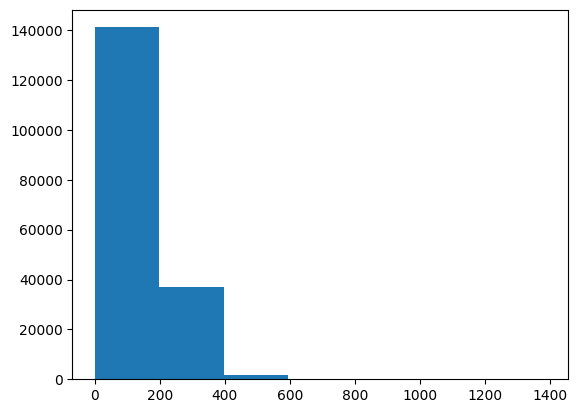

In [ ]:
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

In [ ]:
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [ ]:
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
NUM_CHAR_TOKENS = len(alphabet) + 2
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS, output_sequence_length=output_seq_char_len,standardize="lower_and_strip_punctuation",)

char_vectorizer.adapt(train_chars)

In [ ]:
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [ ]:
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
o u t c o m e   m e a s u r e s   w e r e   a d v e r s e   e v e n t s   a n d   u a   l a b o r a t o r y   r e s u l t s   .

Length of chars: 55

Vectorized chars:
[[ 7 16  3 11  7 15  2 15  2  5  9 16  8  2  9 20  2  8  2  5 10 21  2  8
   9  2  2 21  2  6  3  9  5  6 10 16  5 12  5 22  7  8  5  3  7  8 19  8
   2  9 16 12  3  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  

In [ ]:
inputs = tf.keras.layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
x = tf.keras.layers.Embedding(input_dim=NUM_CHAR_TOKENS,output_dim=25,mask_zero=False,name="char_embed")(char_vectors)
x = tf.keras.layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_3 = tf.keras.Model(inputs=inputs,outputs=outputs,name="model_3_conv1D_char_embedding")

# Compile model
model_3.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [ ]:
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, test_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
model_3_history = model_3.fit(train_char_dataset,epochs=5,validation_data=val_char_dataset)

Epoch 1/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 151s 27ms/step - accuracy: 0.7304 - loss: 0.7098 - val_accuracy: 0.7332 - val_loss: 0.7091
Epoch 2/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 190s 25ms/step - accuracy: 0.7366 - loss: 0.6954 - val_accuracy: 0.7356 - val_loss: 0.7010
Epoch 3/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 142s 25ms/step - accuracy: 0.7404 - loss: 0.6854 - val_accuracy: 0.7358 - val_loss: 0.6986
Epoch 4/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 140s 25ms/step - accuracy: 0.7439 - loss: 0.6786 - val_accuracy: 0.7381 - val_loss: 0.6935
Epoch 5/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 142s 25ms/step - accuracy: 0.7469 - loss: 0.6729 - val_accuracy: 0.7394 - val_loss: 0.6913


In [ ]:
model_3.evaluate(val_char_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7364 - loss: 0.6915


[0.691342830657959, 0.7394081950187683]

In [ ]:
model_3_pred_probs = model_3.predict(test_char_dataset)
model_3_pred_probs

942/942 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step


array([[1.5690507e-01, 9.5852993e-02, 3.0434746e-01, 6.5776505e-02,
        3.7711808e-01],
       [3.1993797e-03, 5.8652498e-02, 5.5843633e-01, 4.7130603e-03,
        3.7499878e-01],
       [8.5333450e-05, 3.9610561e-04, 9.2669505e-01, 5.5997320e-05,
        7.2767511e-02],
       ...,
       [2.3312746e-04, 8.2676606e-03, 1.1212081e-03, 4.9083919e-05,
        9.9032891e-01],
       [1.6097967e-03, 7.8115794e-03, 6.8764649e-02, 6.2793843e-04,
        9.2118597e-01],
       [7.3923193e-02, 5.8507276e-01, 2.4278719e-02, 2.2585709e-01,
        9.0868220e-02]], dtype=float32)

In [ ]:
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds = model_3_preds.numpy()
model_3_preds

array([4, 2, 2, ..., 4, 4, 1])

In [ ]:
model_3_results = calculate_results(y_true=test_labels,y_pred=model_3_preds)
model_3_results

{'accuracy': 73.40301974448316,
 'precision': 0.7297845010853043,
 'recall': 0.7340301974448316,
 'f1': 0.7278348202787268}

## Model 4

In [ ]:
def use_embedding_layer(x):
  return tf_hub_embedding_layer(tf.cast(x, tf.string))

In [ ]:
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf.keras.layers.Lambda(use_embedding_layer, output_shape=(512,))(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,outputs=token_output)

char_inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = tf.keras.layers.Embedding(input_dim=NUM_CHAR_TOKENS,output_dim=25,mask_zero=False,name="char_embed")(char_vectors)
char_bi_lstm = tf.keras.layers.Bidirectional(layers.LSTM(25))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_class, activation="softmax")(final_dropout)

model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

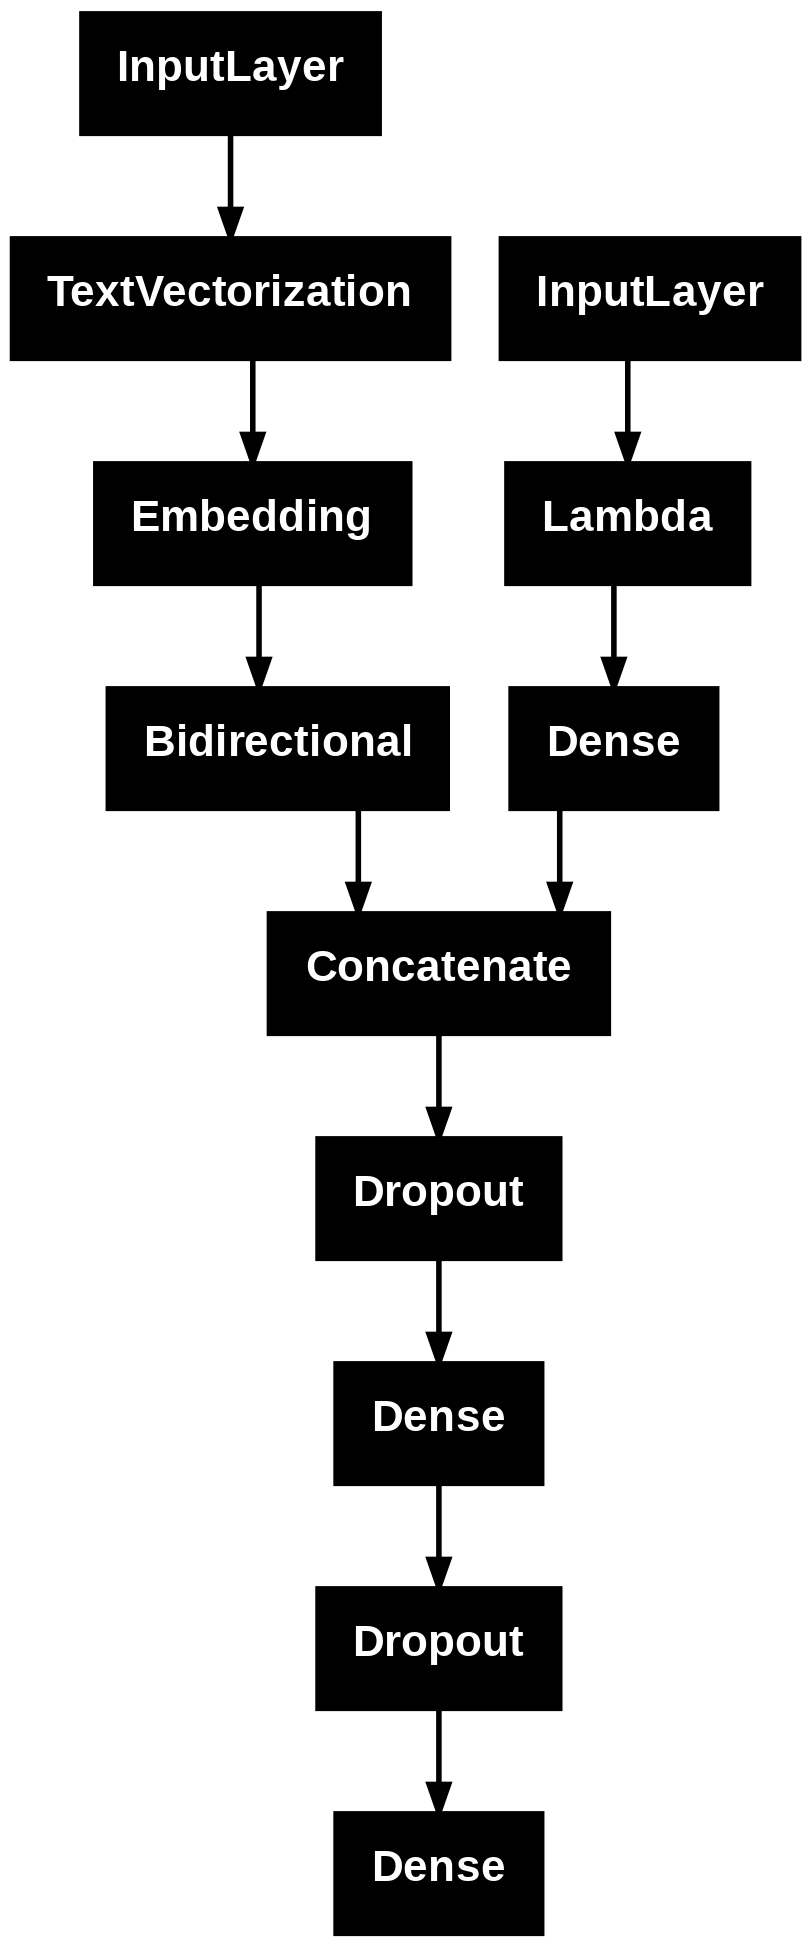

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_4)

In [ ]:
model_4.compile(loss="sparse_categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [ ]:
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_char_token_data = tf.data.Dataset.from_tensor_slices((test_sentences, test_chars))
test_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels)
test_char_token_dataset = tf.data.Dataset.zip((test_char_token_data, test_char_token_labels))
test_char_token_dataset = test_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [ ]:
model_4_history = model_4.fit(train_char_token_dataset,epochs=5,validation_data=val_char_token_dataset)

Epoch 1/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 1573s 279ms/step - accuracy: 0.6691 - loss: 0.8489 - val_accuracy: 0.7584 - val_loss: 0.6317
Epoch 2/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 1358s 239ms/step - accuracy: 0.7388 - loss: 0.6893 - val_accuracy: 0.7719 - val_loss: 0.6025
Epoch 3/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 1454s 258ms/step - accuracy: 0.7485 - loss: 0.6633 - val_accuracy: 0.7771 - val_loss: 0.5857
Epoch 4/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 1357s 240ms/step - accuracy: 0.7569 - loss: 0.6465 - val_accuracy: 0.7778 - val_loss: 0.5813
Epoch 5/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 1332s 237ms/step - accuracy: 0.7624 - loss: 0.6339 - val_accuracy: 0.7808 - val_loss: 0.5727


In [ ]:
model_4.evaluate(test_char_token_dataset)

945/945 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.7791 - loss: 0.5715


[0.5726584196090698, 0.7808486819267273]

In [ ]:
model_4_pred_probs = model_4.predict(test_char_token_dataset)
model_4_pred_probs = tf.argmax(model_4_pred_probs, axis=1)
model_4_pred_probs = model_4_pred_probs.numpy()
model_4_pred_probs

942/942 ━━━━━━━━━━━━━━━━━━━━ 76s 81ms/step


array([0, 2, 2, ..., 4, 4, 1])

In [ ]:
model_4_results = calculate_results(y_true=test_labels, y_pred=model_4_pred_probs)
model_4_results

{'accuracy': 77.30877716940435,
 'precision': 0.7712286495224827,
 'recall': 0.7730877716940435,
 'f1': 0.7681669475480598}

## Model 5

In [ ]:
train_df.head()

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11


In [ ]:
train_df["line_number"].value_counts()

,count
line_number,
0,15000
1,15000
2,15000
3,15000
4,14992
5,14949
6,14758
7,14279
8,13346


<Axes: ylabel='Frequency'>

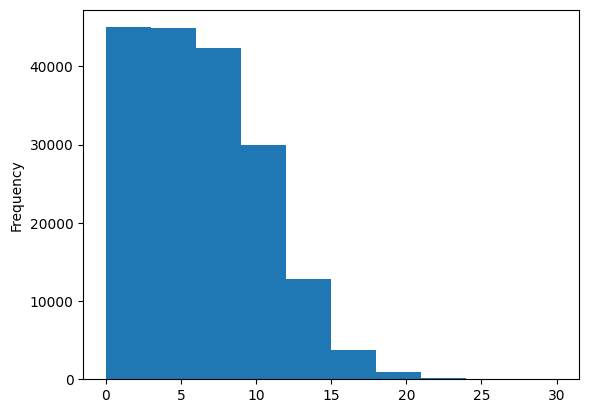

In [ ]:
train_df.line_number.plot.hist()

In [ ]:
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

In [ ]:
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:20]

(TensorShape([180040, 15]),
 <tf.Tensor: shape=(20, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0.

In [ ]:
train_df["total_lines"].value_counts()

,count
total_lines,
11,24468
10,23639
12,22113
9,19400
13,18438
14,14610
8,12285
15,10768
7,7464


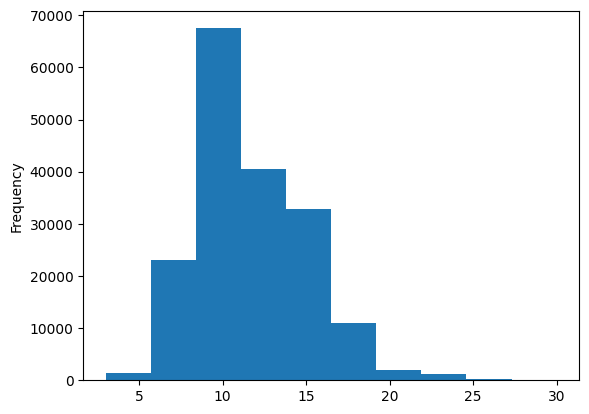

In [ ]:
train_df.total_lines.plot.hist();

In [ ]:
np.percentile(train_df.total_lines, 98)

20.0

In [ ]:
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]

(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

In [ ]:
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf.keras.layers.Lambda(use_embedding_layer, output_shape=(512,))(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,outputs=token_outputs)

char_inputs = layers.Input(shape=(1,), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = tf.keras.layers.Embedding(input_dim=NUM_CHAR_TOKENS,output_dim=25,mask_zero=False,name="char_embed")(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(32))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,outputs=char_bi_lstm)

line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,outputs=x)

total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,outputs=y)

combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output, char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)

z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,total_line_model.output,z])

output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)

model_5 = tf.keras.Model(inputs=[line_number_model.input,total_line_model.input,token_model.input, char_model.input],outputs=output_layer)

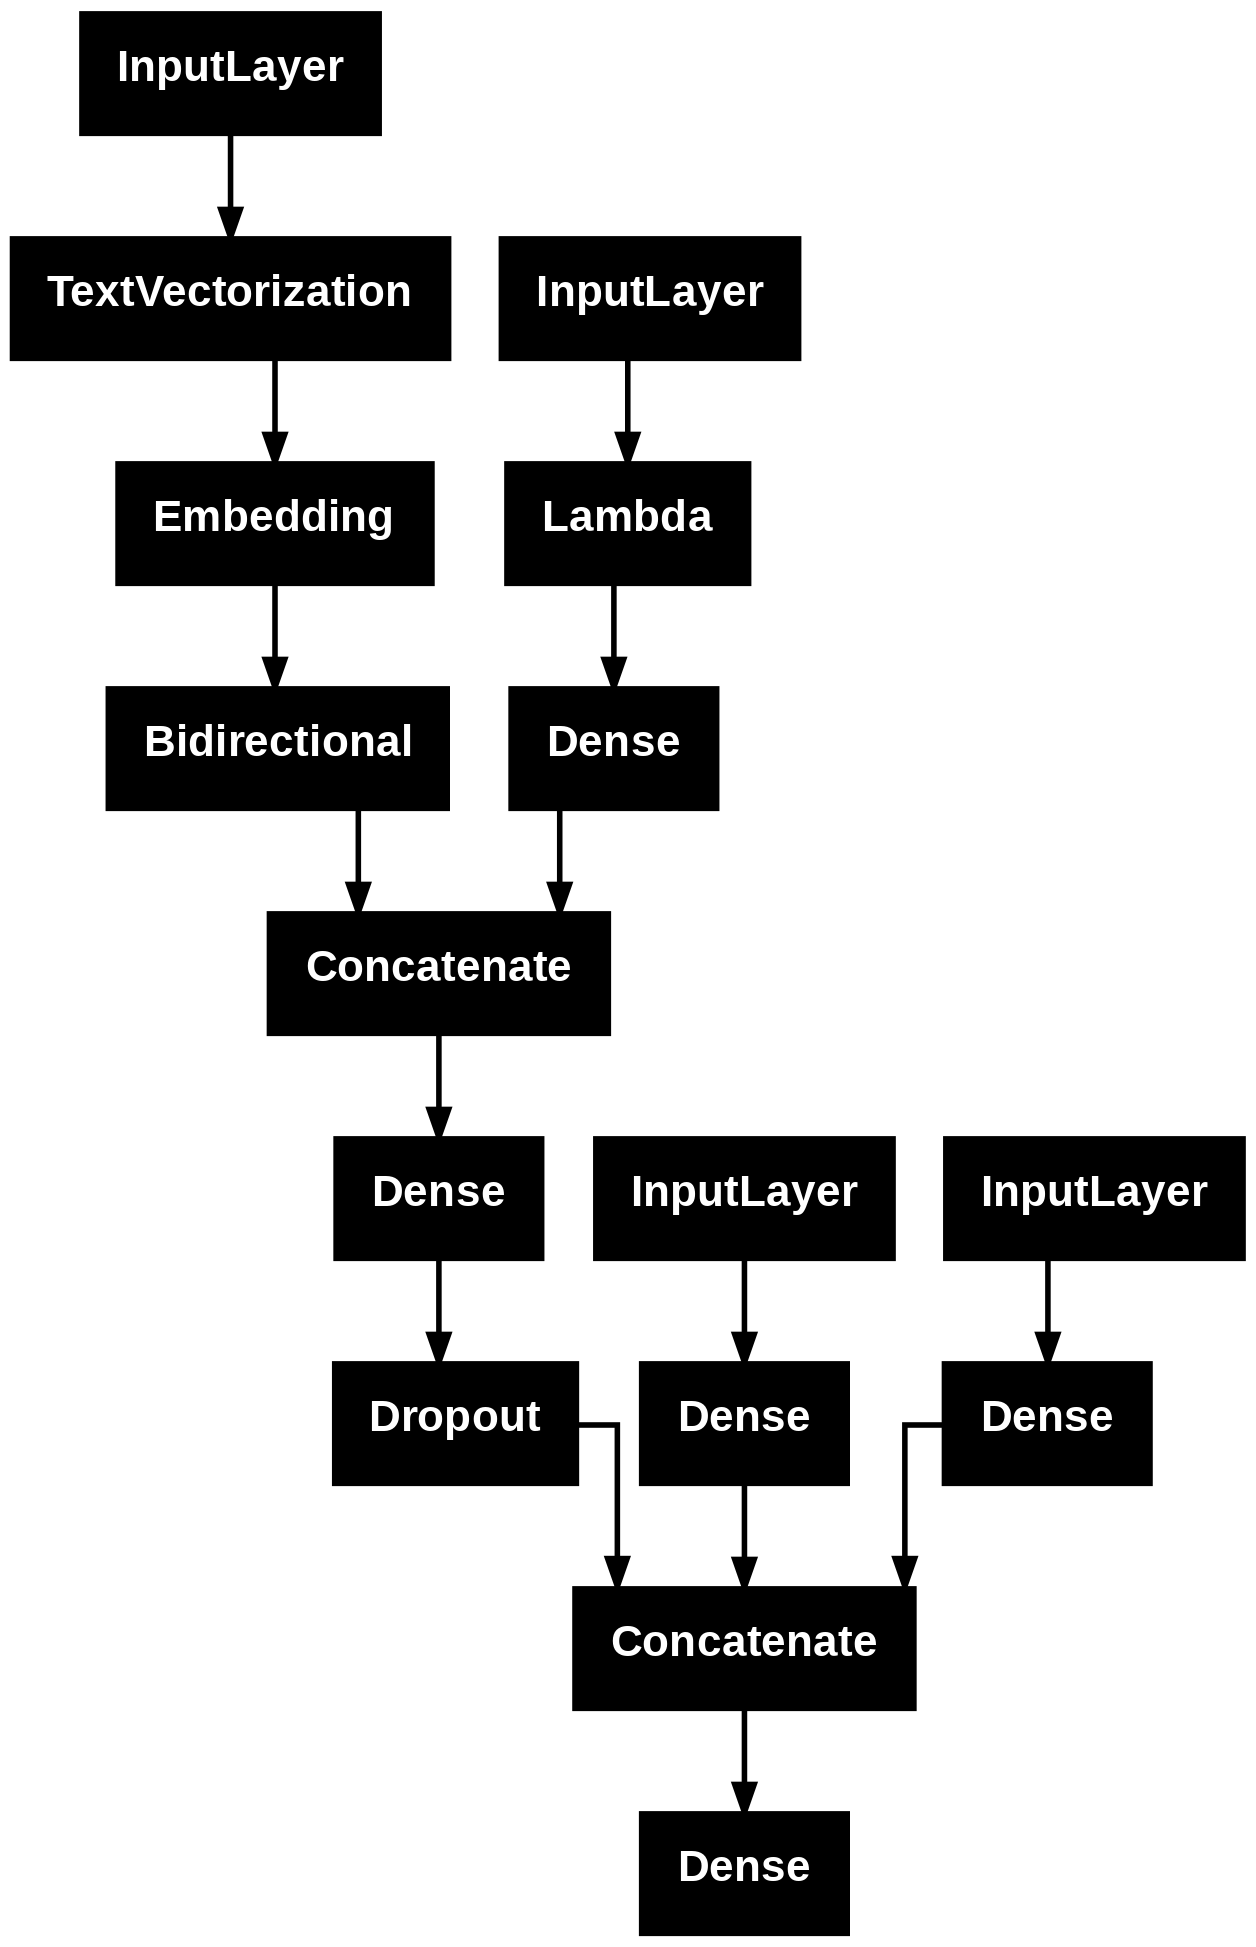

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_5)

In [ ]:
for layer in model_5.layers:
  print(layer, layer.trainable)

<InputLayer name=char_inputs, built=True> True
<InputLayer name=token_inputs, built=True> True
<TextVectorization name=text_vectorization_1, built=True> True
<Lambda name=lambda_4, built=True> True
<Embedding name=char_embed, built=True> True
<Dense name=dense_16, built=True> True
<Bidirectional name=bidirectional_3, built=True> True
<Concatenate name=token_char_hybrid_embedding, built=True> True
<InputLayer name=line_number_input, built=True> True
<InputLayer name=total_lines_input, built=True> True
<Dense name=dense_19, built=True> True
<Dense name=dense_17, built=True> True
<Dense name=dense_18, built=True> True
<Dropout name=dropout_6, built=True> True
<Concatenate name=token_char_positional_embedding, built=True> True
<Dense name=output_layer, built=True> True


In [ ]:
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [ ]:
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,train_total_lines_one_hot,train_sentences,train_chars))
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels)
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels))
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,val_total_lines_one_hot,val_sentences,val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_pos_char_token_data = tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot,test_total_lines_one_hot,test_sentences,test_chars))
test_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(test_labels)
test_pos_char_token_dataset = tf.data.Dataset.zip((test_pos_char_token_data, test_pos_char_token_labels))
test_pos_char_token_dataset = test_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_pos_char_token_dataset, val_pos_char_token_dataset, test_pos_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [ ]:
history_model_5 = model_5.fit(train_pos_char_token_dataset,epochs=5,validation_data=val_pos_char_token_dataset)

Epoch 1/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 1439s 251ms/step - accuracy: 0.7773 - loss: 0.5833 - val_accuracy: 0.8515 - val_loss: 0.3827
Epoch 2/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 1437s 255ms/step - accuracy: 0.8571 - loss: 0.3801 - val_accuracy: 0.8615 - val_loss: 0.3584
Epoch 3/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 1447s 253ms/step - accuracy: 0.8698 - loss: 0.3496 - val_accuracy: 0.8657 - val_loss: 0.3514
Epoch 4/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 1423s 253ms/step - accuracy: 0.8763 - loss: 0.3298 - val_accuracy: 0.8651 - val_loss: 0.3519
Epoch 5/5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 1421s 253ms/step - accuracy: 0.8830 - loss: 0.3145 - val_accuracy: 0.8657 - val_loss: 0.3555


In [ ]:
model_5.evaluate(test_pos_char_token_dataset)

942/942 ━━━━━━━━━━━━━━━━━━━━ 58s 62ms/step - accuracy: 0.8598 - loss: 0.3789


[0.3763371706008911, 0.8598307371139526]

In [ ]:
model_5_pred_probs = model_5.predict(test_pos_char_token_dataset, verbose=1)
model_5_pred_probs

942/942 ━━━━━━━━━━━━━━━━━━━━ 61s 63ms/step


array([[4.52672094e-01, 1.43130245e-02, 1.31810736e-02, 2.14007348e-01,
        3.05826485e-01],
       [1.09756522e-01, 3.90506029e-04, 6.43268526e-01, 1.05576701e-01,
        1.41007736e-01],
       [1.27259133e-04, 5.65839764e-06, 9.91010189e-01, 3.80675978e-04,
        8.47622752e-03],
       ...,
       [1.55695088e-05, 1.34783695e-02, 1.07903070e-04, 4.50669035e-07,
        9.86397684e-01],
       [5.57939580e-04, 3.01310159e-02, 6.30874070e-04, 9.98515225e-06,
        9.68670130e-01],
       [7.04880338e-03, 9.54115152e-01, 5.82630932e-03, 2.61379028e-04,
        3.27484049e-02]], dtype=float32)

In [ ]:
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds = model_5_preds.numpy()
model_5_preds

array([0, 2, 2, ..., 4, 4, 1])

In [ ]:
model_5_results = calculate_results(y_true=test_labels,y_pred=model_5_preds)
model_5_results

{'accuracy': 85.98307615729219,
 'precision': 0.8604364587542596,
 'recall': 0.8598307615729218,
 'f1': 0.8575691833280051}

## Evaluate The Model

In [ ]:
all_model_results = pd.DataFrame({"baseline": baseline_results,"conv1d": model_1_results,"pretrained_token": model_2_results,"custom_embed_conv1d": model_3_results,"hybrid_char_token_embed": model_4_results,"tribrid_pos_char_token_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,71.667496,0.712432,0.716675,0.692510
conv1d,76.436038,0.766230,0.764360,0.764410
pretrained_token,76.674963,0.765067,0.766750,0.762699
custom_embed_conv1d,73.403020,0.729785,0.734030,0.727835
hybrid_char_token_embed,77.308777,0.771229,0.773088,0.768167
tribrid_pos_char_token_embed,85.983076,0.860436,0.859831,0.857569


In [ ]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100

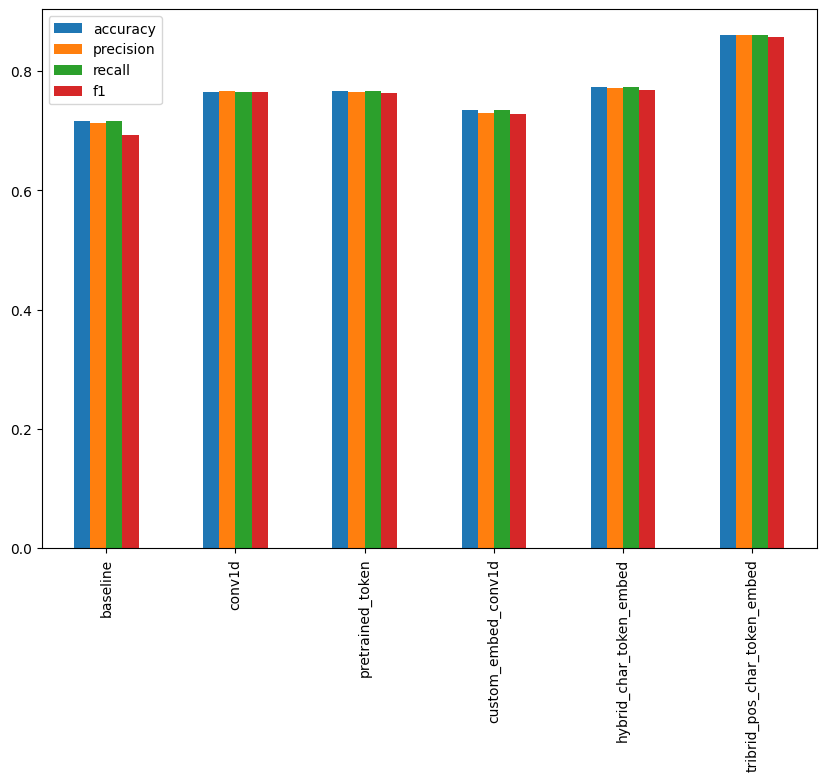

In [ ]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend();

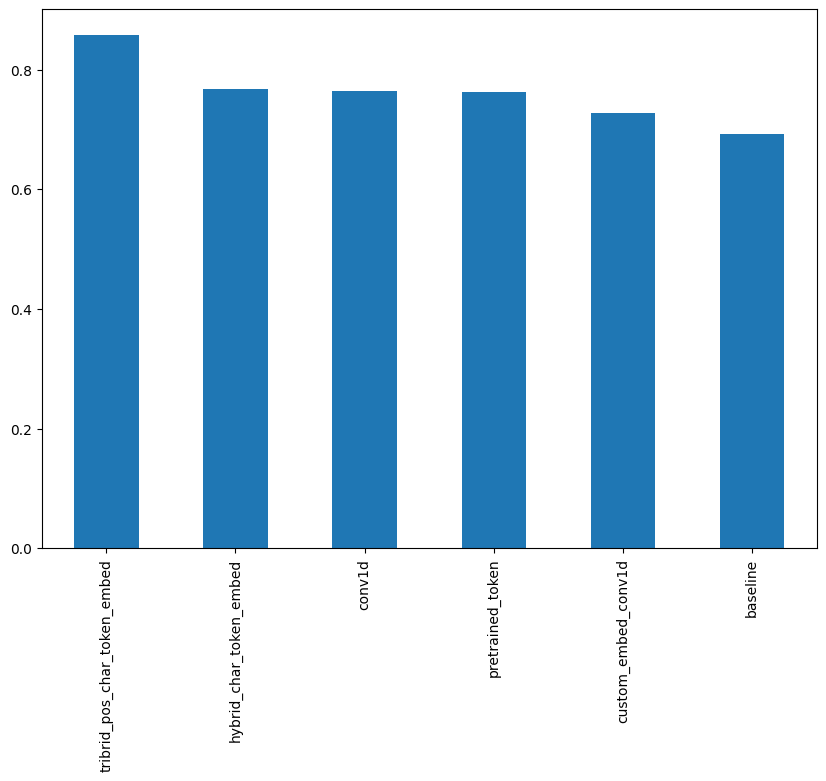

In [ ]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));